# Week 5-6: Image Quantization

<font size="6"> Laboratory 3 </font> <br>
<font size="3"> Last updated July 24, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- Probability mass function
- Cumulative distribution function
     
<font size="5"> Programming Skills </font>
- Functions
- Loops
- Multi-dimensional arrays
    
<font size="5"> Embedded Systems </font>
- Thonny and MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>

- Raspberry Pi Pico
- Breadboard
- USB connector
- Camera (Arducam HM01B0)
- 8 Wires


<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Shiva Sai Vummaji

**Email:** svummaji@purdue.edu

## <span style="color:orange;"> 1. Quantization  </span>

In [The Data Science Labs on Mulitvariable Calculus](https://thedatasciencelabs.github.io/DataLab_Multivariate_Calculus/intro.html), we briefly introduce uniform quantization methods. Quantization of images refers to the process of reducing the information in an image from a wider range of values to a smaller range. Quantization is used for image compression to save storage space on devices, for creating image filters, and for processes like printing. As we saw observed in the previous lab on texture identification, grayscale images contain values between 0 and 255. However, what if we could only use 5 or 10 discrete values? In that case, we would require a mapping or function that transforms our original range of 0-255 to the 5 or 10 new discrete levels.

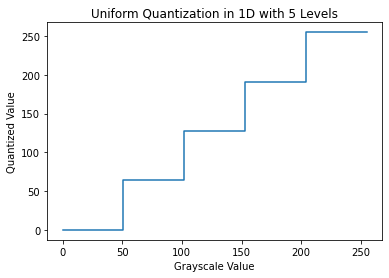

In [1]:
import numpy as np
import matplotlib.pyplot as plt    

num_levels=5
# creates a numpy array of (length num_levels + 1) evenly spaced floating points from 0 to 255
x = np.linspace(0,255,num_levels+1)
# # creates a numpy array of (length num_levels) evenly spaced floating points from 0 to 255
y = np.linspace(0,255,num_levels)
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title(f'Uniform Quantization in 1D with {num_levels} Levels')
plt.show()

We can interpret uniform quantization from this graph. Given a image $I$ with dimensions $m\times n$, at each pixel location $(i,j)$, we have a grayscale value, which is an integer ranging from 0 to 255. Then, based on the graph, we modify the grayscale value at $(i,j)$ to a new value. For instance, with 5 quantization levels, if the original grayscale value is 40, we will change it to 0.

### <span style="color:red"> Exercise 1</span>

Write a function that takes in a grayscale image as a NumPy array and returns a uniformly quantized image with $k$ levels. Download [low_contrast.jpg](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/ba00b60fad5c429ee02184eb4045928583cee7bd/book/labs/2_frequency/lab_03/additional_files/images/low_contrast.jpg) and show your results when $k=2,5,10,25$.

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Below </h3>

image size is (1096, 1680)


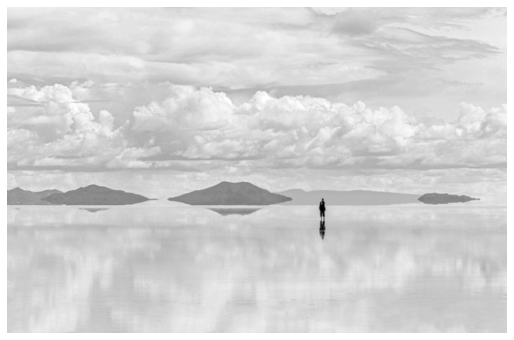

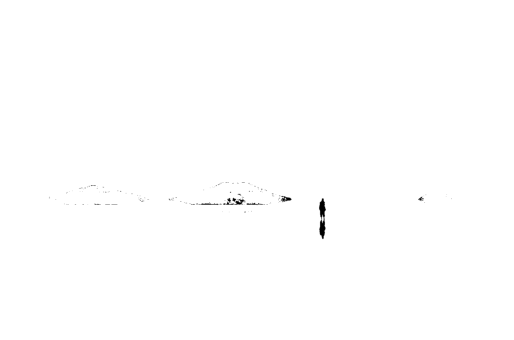

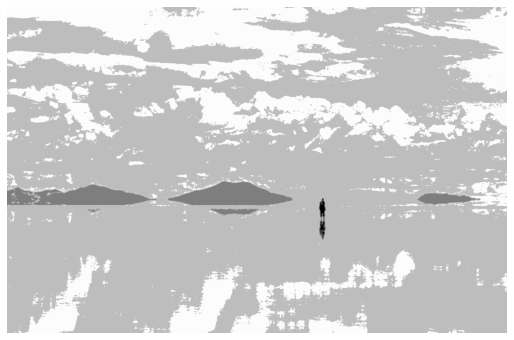

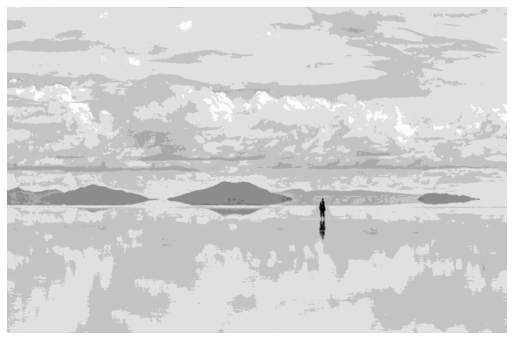

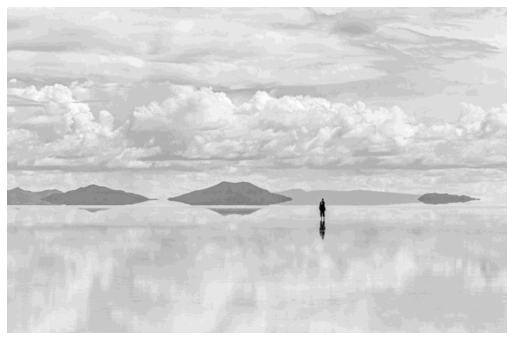

In [5]:
from PIL import Image                                   # needed for reading images

img = np.array(Image.open('low_contrast.jpg'))          # read in the image and store it as a numpy array
print(f'image size is {img.shape}')
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

# COMPLETE YOUR FUNCTION HERE
def uniform_quantization(img, k):
    levels = np.linspace(0, 255, k)
    s = 255 // (k - 1)
    quantized_image = np.round(img / s) * s
    quantized_image = np.clip(quantized_image, 0, 255)
    return quantized_image.astype(np.uint8)

# these are the test cases

quantized_img = uniform_quantization(img, 2)            # uniform quantization with k = 2
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 5)            # uniform quantization with k = 5
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 10)           # uniform quantization with k = 10
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 25)           # uniform quantization with k = 25
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

### <span style="color:red"> Exercise 2</span>

Write a function that quantizes an image according to the power function shown below with $k$ levels and power $p$. This is an example of non-uniform quantization.

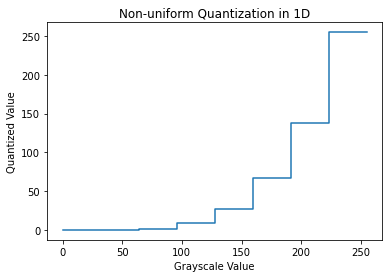

In [6]:
num_levels = 8
power = 4.0 
x = np.linspace(0,255,num_levels+1)
y = np.power( np.linspace(0, 255**(1/power), num=num_levels), power) 
  
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title('Non-uniform Quantization in 1D')
plt.show()

<h3 style="background-color:lightblue"> Write Answer for Exercise 2 Below </h3>

image size is (1096, 1680)


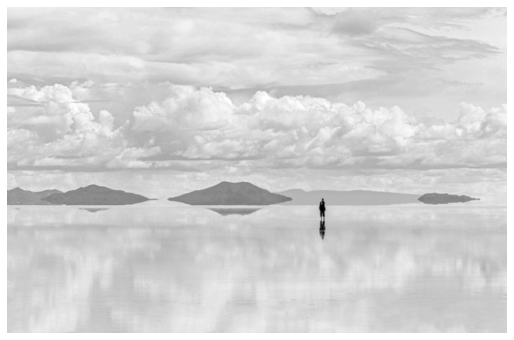

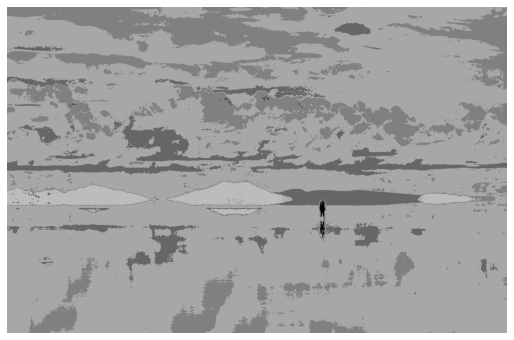

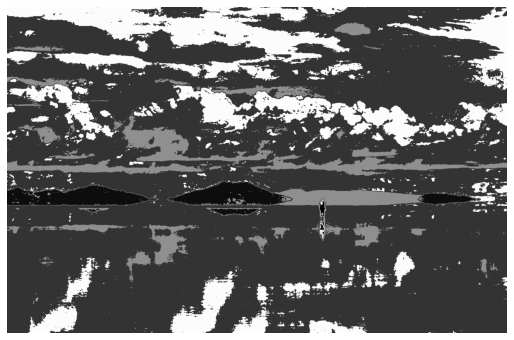

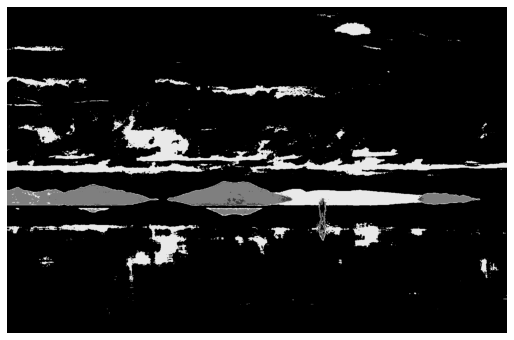

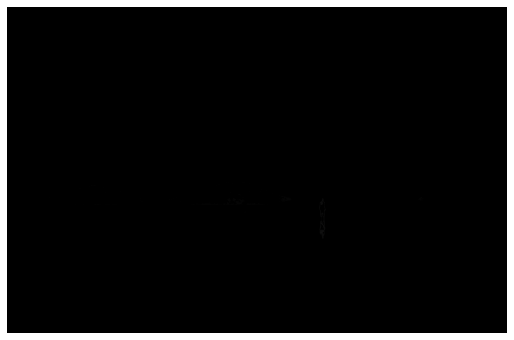

In [8]:
# COMPLETE YOUR FUNCTION HERE
def power_quantization(img, k, p):
    x = np.linspace(0,255,k+1)
    y = np.power(np.linspace(0, 255*(1/p), num=k), p)
    
    quantized_image = np.zeros_like(img)
    for i in range(k):
        mask = (img >= x[i]) & (img < x[i + 1])
        quantized_image[mask] = y[i]
    return quantized_image


img = np.array(Image.open('low_contrast.jpg'))          # read in the image and store it as a numpy array
print(f'image size is {img.shape}')
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

# these are the test cases

quantized_img = power_quantization(img, 8, 2.0)            # uniform quantization with k = 2
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = power_quantization(img, 8, 4.0)            # uniform quantization with k = 5
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = power_quantization(img, 8, 6.0)           # uniform quantization with k = 10
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = power_quantization(img, 8, 8.0)           # uniform quantization with k = 25
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

## <span style="color:orange;"> 2. Histogram Equalization  </span>

Histogram equalization is an adaptive image processing method, which means that the transformation depends on the image itself. It is commonly used in medical imaging applications, as well as in scientific imaging fields such as astronomy and microbiology. In contrast to the non-adaptive uniform quantization method we discussed in the previous exercise, histogram equalization takes into account the specific characteristics of each image. 

Let's consider an image $I$ of size $m \times n$. We can determine the probability that a pixel value is at level $\ell$ by calculating the frequency of $\ell$ in the image. This probability, known as the probability mass function (pmf), can be expressed as:

$$ p_I(\ell) = \frac{\text{ \# of times $\ell$ appears in $I$}}{m\cdot n}\quad \text{ for } \ell = 0,1,2,\dots,255 $$


Furthermore, we can compute the cumulative distribution function (cdf) of $I$, denoted as $F_I(\ell)$, which represents the probaiblity that a pixel in I has a value less than or equal to $\ell$. The cdf is calculated as the cumulative sum of the pmf values:
 
$$ F_I(\ell) = \sum_{j=0}^\ell p_I(j) \quad \text{ for } \ell = 0,1,2,\dots,255$$

By analyzing the pmf and cdf of an image, we can gain insights into the distribution of pixel values and use this information to perform histogram equalization.

### <span style="color:red"> Exercise 3</span>

Plot the probability mass function and the cumulative distribution function of `low_contrast.jpg`.

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>

image size is (1096, 1680)


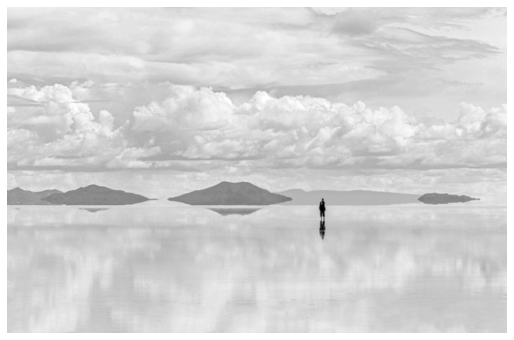

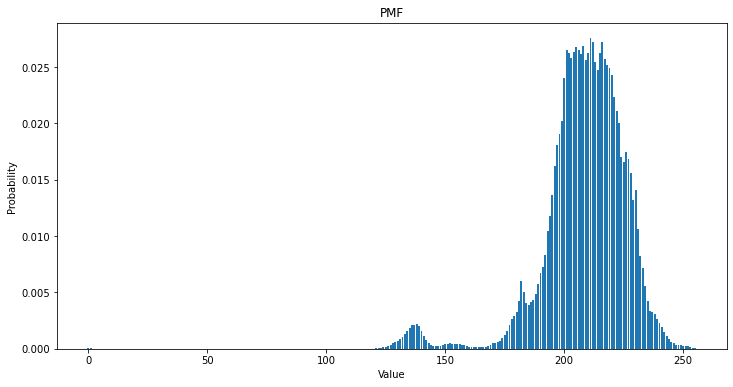

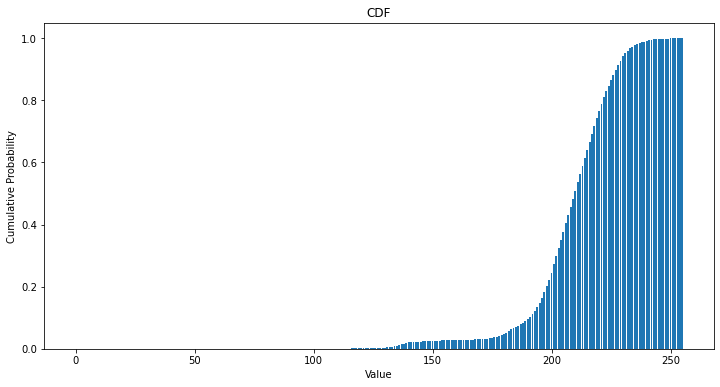

In [10]:
img = np.array(Image.open('low_contrast.jpg'))          # read in the image and store it as a numpy array
print(f'image size is {img.shape}')
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

hist, bins = np.histogram(img.flatten(), bins = 256, range=[0, 255])
pmf = hist / img.size

plt.figure(figsize = (12, 6))
plt.bar(range(256), pmf)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF")
plt.show()

cdf = np.cumsum(pmf)
plt.figure(figsize = (12, 6))
plt.bar(range(256), cdf)
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("CDF")
plt.show()

### <span style="color:red"> Exercise 4 Part 1</span>

Plot the pmf and cdf of `low_contrast.jpg` after uniform quantization with $25$ levels.

<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 1 Below </h3>

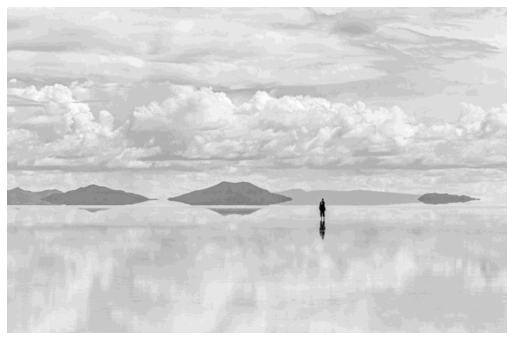

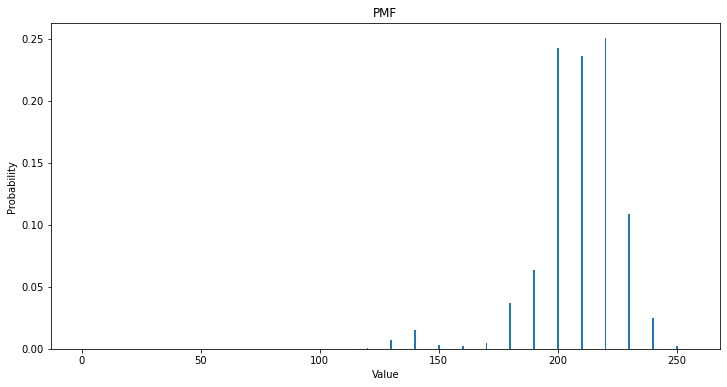

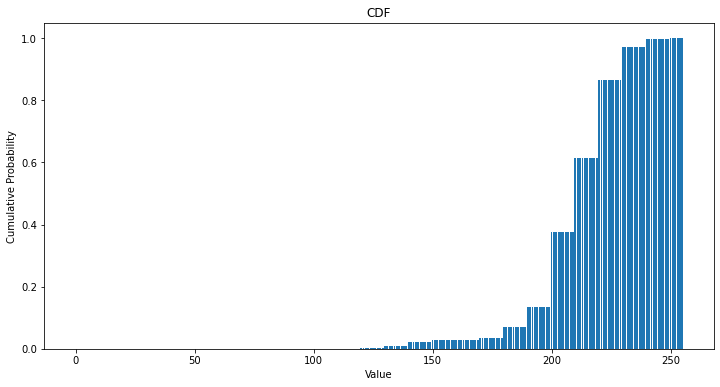

In [13]:
img = np.array(Image.open('low_contrast.jpg'))          # read in the image and store it as a numpy array
quantized_img = uniform_quantization(img, 25)           # uniform quantization with k = 25
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

hist, bins = np.histogram(quantized_img.flatten(), bins = 256, range=[0, 255])
pmf = hist / quantized_img.size

plt.figure(figsize = (12, 6))
plt.bar(range(256), pmf)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("PMF")
plt.show()

cdf = np.cumsum(pmf)
plt.figure(figsize = (12, 6))
plt.bar(range(256), cdf)
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("CDF")
plt.show()

### <span style="color:red"> Exercise 4 Part 2</span>
Describe how the quantization process changed these two functions.
<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 2 Below </h3>

The quantization process changed these 2 functions because before quantization, the original pmf graph looked continuous and values were more spread apart. In the pmf graph after quantization, pmf doesn't look continuous anymore; instead, it looks like it is divided into bins. In terms of the cdf, the graph before quantization showed a very smooth and steady increase; however, with quantization, it looks like a step graph. Overall, pmf went from a continuous distribution to a discrete one and cdf went from a continous and smooth curve to a step function. The quantization process is a compression, so it's a simpler representation but it loses some of the details.

Now, we will derive the method of histogram equalization.

We start with an image $I$ of size $m\times n$, and our objective is to define a mapping that transforms the original pixel intensities to new values. Let's denote the transformed image as $I_{new}$.

The goal of histogram equalization is to distribute pixel intensities evenly across the entire range of values from 0 to 255. This means that $I_{new}$ will have an equal number of pixels at each intensity level, resulting in a flat probability mass function (pmf) for $I_{new}$.

### <span style="color:red"> Exercise 5</span>

If the pmf of $I_{new}$ is flat, how will the cdf of $I_{new}$ look? Why?

<h3 style="background-color:lightblue"> Write Answers for Exercise 5 Below </h3>

If the pmf of I_new is flat, then the cdf of it will be a straight line with positive slope, because the formula for cdf is that we are adding the pmf value for each x value. If the pixel intensity is the same across all x values, then we are essentially adding to the cdf by the same amount at a constant rate. This will result in a linear line with postive slope. 

We can denote the cdf of $I_{new}$ by $ H(\ell) = \sum_{j=0}^\ell p_{I_{new}}(j) \quad \text{ for } \ell = 0,1,2,\dots,255 $

If $I_{new}$ has the same number of pixels at each intensity, then there are $\frac{m\cdot n }{255}$ pixels with a value of $\ell$ for $\ell = 0,1,2,\dots,255$.

### <span style="color:red"> Exercise 6</span>

Explain why $ H(\ell) = \frac{(\ell + 1)}{255} \quad \text{ for } \ell = 0,1,2,\dots,255 $

<h3 style="background-color:lightblue"> Write Answer for Exercise 6 Below </h3>

Because the pixel intensitites are evenly across the entire range of values, the pmf PI_new(j) would be 1/255 for l = 0, ..., 255. If I substitute that into H(l), I would get sum_{j=0}^{l} 1/255, which can be simplifed into (l + 1)*(1/255). This would then result in (l + 1)/255.

Now, in image $I$, the grayscale value 0 will change to some new value between $0$ and $255$.
Since we haven't defined the exact transformation map, let's call that new level $n_0$.
Similarly, we will change pixels in $I$ with the grayscale value 1 to some new value $n_1$.
Pixels with value 2 in $I$ will change to the value $n_2$, and so on until we reach $n_{255}$.

In other words, in our transformed image $I_{new}$, we map the intensity levels $0,1,2,\dots,255$ in the original image $I$ to some new levels $n_0,n_1,n_2,\dots,n_{255}$.

We want the number of pixels with intensity between $0$ and $\ell$ in image $I$ to be the same as the number of pixels with intensity between $0$ and $n_\ell$ in image $I_{new}$.

By definition, $F_I(\ell)$ is the number pixels in $I$ with intensity between $0$ and $\ell$. Similarly, $H(n_\ell)$ is the number of pixels in $I_{new}$ with intensity between $0$ and $n_\ell$.

To determine the ideal levels $n_0,n_1,n_2,\dots,n_{255}$ that will even out the grayscale intensity in image $I$, we want to set
$ F_I(\ell)  = H(n_\ell)\quad \text{ for } \ell = 0,1,2,\dots,255. $


### <span style="color:red"> Exercise 7</span>

In the last line, evaluate the function $H$ at $n_\ell$ and solve for $n_\ell$. Format your answer using $\LaTeX$.

<h3 style="background-color:lightblue"> Write Answers for Exercise 7 Below </h3>

From previous exercise, it is clear that: $H(n_l) = \frac{(n_l + 1)}{255}$. Then, similarly because $F_I(l) = H(n_l)$, we can write $F_I(l) = \frac{(n_l + 1)}{255}$. I can solve for $n_l$ by multiplying both sides by 255 and subtracting by 1, resulting in $n_l = 255 * F_I(l) - 1$.

---
**NOTE**

This is a 2-week lab. Turn in the exercises above. Pick up from here during the next lab session.

--- 

### <span style="color:red"> Exercise 8</span>

Now that we know the values for $n_0,n_1,n_2,\dots,n_{255}$, we are ready to implement the histogram equalization process.

Implement histogram equalization on `low_contrast.jpg`. 
Plot the transformed image $I_{new}$ along with the pmf and cdf of $I_{new}$. 

*Hint: If the new levels $n_0,n_1,\dots,n_{255}$ are not integers (which is likely), then use `np.floor` function to round down.*

<h3 style="background-color:lightblue"> Write Answers for Exercise 8 Below </h3>

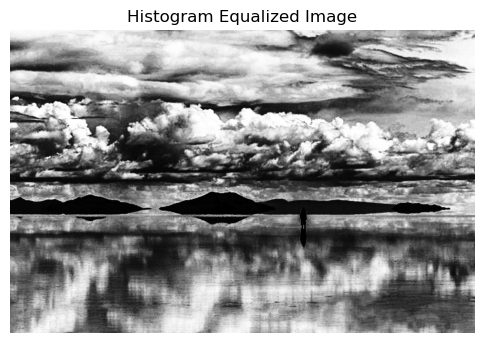

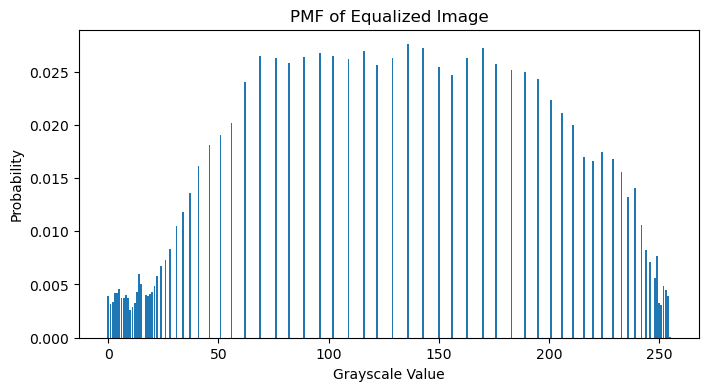

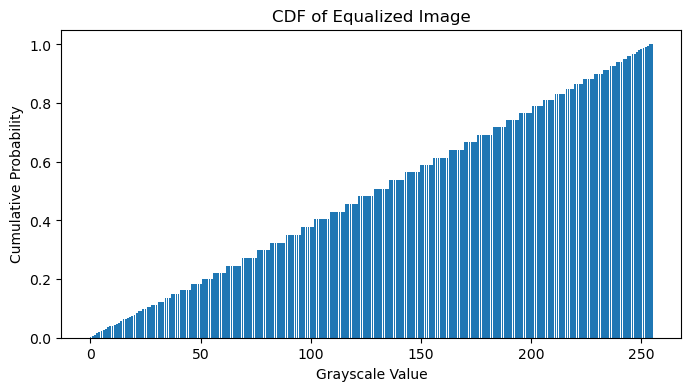

In [19]:
from PIL import Image
img = np.array(Image.open('low_contrast.jpg'))
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 255])
pmf = hist / img.size
cdf = np.cumsum(pmf)
cdf_normalized = cdf * 255

equalized_img = np.floor(cdf_normalized[img]).astype(np.uint8)

# Transformed image
plt.figure(figsize=(6, 6))
plt.imshow(equalized_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram Equalized Image")
plt.show()

hist_eq, bins_eq = np.histogram(equalized_img.flatten(), bins=256, range=[0, 255])
pmf_eq = hist_eq / equalized_img.size

# pmf of equalized
plt.figure(figsize=(8, 4))
plt.bar(range(256), pmf_eq)
plt.xlabel("Grayscale Value")
plt.ylabel("Probability")
plt.title("PMF of Equalized Image")
plt.show()

cdf_eq = np.cumsum(pmf_eq)

# cdf of equalized
plt.figure(figsize=(8, 4))
plt.bar(range(256), cdf_eq)
plt.xlabel("Grayscale Value")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Equalized Image")
plt.show()



## <span style="color:orange;"> 3. Connecting the Camera </span>

This time, we will record our own videos using the Arducam HM01B0, which is a small camera that can be connected to the Pico. 

### Wiring Instructions

Please ensure that your microcontroller is not connected to the computer while you are wiring components together. If you are unsure about your wiring, please consult the instructor. Use your jumper wires to establish the following connections:

| HM01B0 | Pico |
|--------|------|
| VCC    | 3V3  |
| SCL    | GP5  |
| SDA    | GP4  |
| VSYNC  | GP16 |
| HREF   | GP15 |
| PCLK   | GP14 |
| DO     | GP6  |
| GND    | GND  |

Here is an image of the completed breadboard:

![img](https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/connecting_the_camera/HM01B0_and_pico.png)

<!-- ![img](camera.jpg)

*Wiring the Arducam HM01B0 camera* 

![img](camerawiring.jpg)

*Connections to the PICO on breadboard* -->

To find the names of the pins on the Raspberry Pi Pico, you can refer to its pinout diagram located [here](https://datasheets.raspberrypi.com/pico/Pico-R3-A4-Pinout.pdf) or in the Extra Materials section. The HM01B0, on the other hand, should have its pins labeled.

After confirming that the wiring is correct, press and hold the BOOTSEL button on the Pico while plugging it in. Download the [arducam.uf2](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/main/book/labs/shared_files/connecting_the_camera/arducam.uf2) file and copy it onto the Pico's drive using your computer's file manager (it should be listed as an external drive: "RPI-RP2") and not with Thonny. Once the file transfer is complete, the Pico will automatically disconnect, and its LED will start blinking rapidly. 

Once the Pico has been successfully connected, please execute the following cell to ensure that we have successfully detected the Pico.

In [1]:
import time
import serial
from serial.tools import list_ports

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
/dev/cu.debug-console n/a
/dev/cu.ShivasBoseFlexSoundLink n/a
/dev/cu.Bluetooth-Incoming-Port n/a
/dev/cu.usbmodem2101 USB VID:PID=2E8A:000A SER=E660C062136C6133 LOCATION=2-1

selected port /dev/cu.usbmodem2101 as most likely to have a raspberry pi pico


### Capturing a still image

Now that the Pico and camera have been connected, execute the following cell to capture a still image.

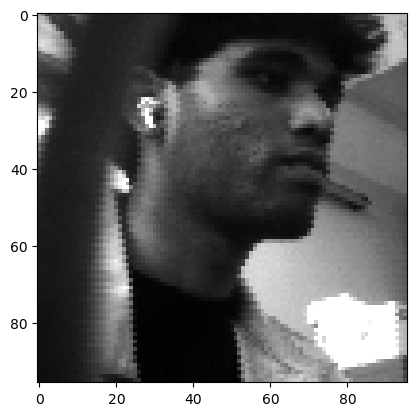

In [27]:
import numpy as np
import matplotlib.pyplot as plt

buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer

plt.imshow(img, cmap="gray")
plt.show()

### <span style="color:red"> Exercise 9</span>

Repeat the previous exercise using your own captured image from the Arducam HM01B0 connected to a Pico.

<h3 style="background-color:lightblue"> Write Answers for Exercise 9 Below </h3>

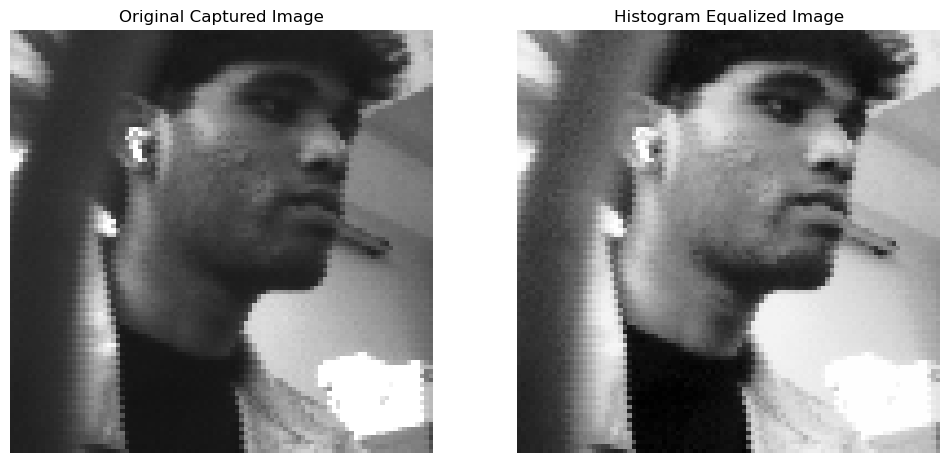

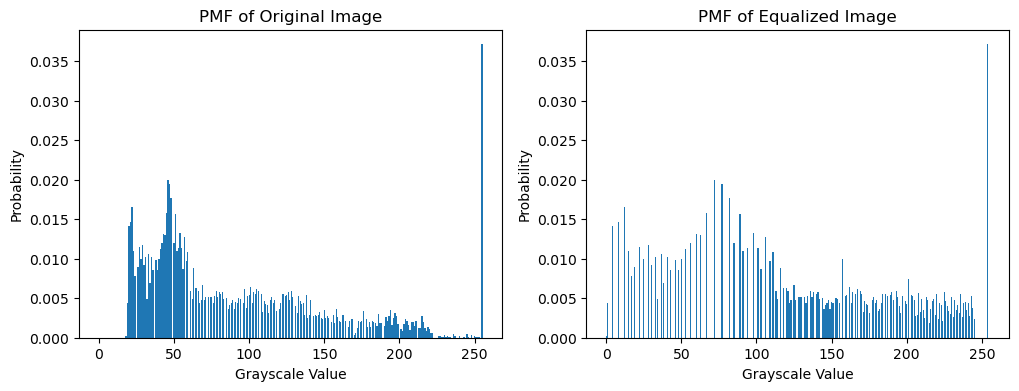

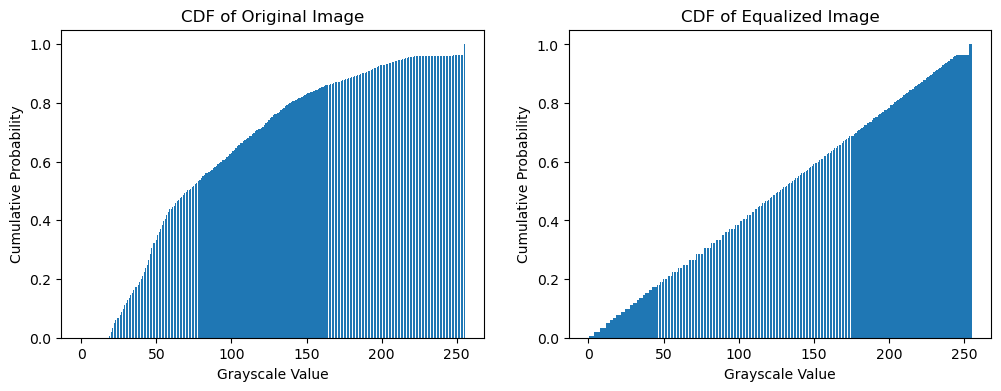

In [28]:
img = img.astype(np.uint8)
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 255])
pmf = hist / img.size
cdf = np.cumsum(pmf)
cdf_normalized = cdf * 255

equalized_img = np.floor(cdf_normalized[img]).astype(np.uint8)

# Original and transformed
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Captured Image")
axes[0].axis("off")

axes[1].imshow(equalized_img, cmap="gray", vmin=0, vmax=255)
axes[1].set_title("Histogram Equalized Image")
axes[1].axis("off")

plt.show()

hist_eq, bins_eq = np.histogram(equalized_img.flatten(), bins=256, range=[0, 255])
pmf_eq = hist_eq / equalized_img.size
cdf_eq = np.cumsum(pmf_eq)

# pmf of equalized
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(range(256), pmf)
axes[0].set_title("PMF of Original Image")
axes[0].set_xlabel("Grayscale Value")
axes[0].set_ylabel("Probability")

axes[1].bar(range(256), pmf_eq)
axes[1].set_title("PMF of Equalized Image")
axes[1].set_xlabel("Grayscale Value")
axes[1].set_ylabel("Probability")

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(range(256), np.cumsum(pmf))
axes[0].set_title("CDF of Original Image")
axes[0].set_xlabel("Grayscale Value")
axes[0].set_ylabel("Cumulative Probability")

axes[1].bar(range(256), cdf_eq)
axes[1].set_title("CDF of Equalized Image")
axes[1].set_xlabel("Grayscale Value")
axes[1].set_ylabel("Cumulative Probability")

plt.show()



### <span style="color:red"> Exercise 10</span>

Can you think of any images that would not show significant improvement after applying histogram equalization?

<h3 style="background-color:lightblue"> Write Answer for Exercise 10 Below </h3>

Yes, I can think of images that would not show significant improvement after applying histograpm equilization. For example, histogram equilzation works best when the image has low contrast but if the image has high contrast where the pixel values are already spread apart, then it won't help improve as much. Additionally, images that are very noisy also might not have that much improvement after applying histogram equalization.

### <span style="color:red"> Exercise 11</span>

What happens if we first quantize the image, either uniformly or non-uniformly, with $k$ levels and then apply the histogram equalization process? On the other hand, what happens if we apply histogram equalization first and then perform uniform or non-uniform quantization? How will increasing or decreasing the number of quantization levels $k$ change the new pmf and cdf? 

Write your hypothesis in a paragraph or two.

<h3 style="background-color:lightblue"> Write Answers for Exercise 11 Below </h3>

If we quantize the image first, either uniformly or non-uniformly, with k levels and apply the histogram equalization process, the impact would be dependent on the number of levels. For example, if k is relatively small like 8 or 4, then histogram equalization won't have that much impact. On the other hand, if we apply histogram equalization first, then it will spread out the intensity values first and then the image will be more contrasted. If we apply quantization with low k value after, then the image will not have the histogram equalization because intensity values will be compressed. But if the value of k is high, then histogram equalization will still have an impact. Increasing k value will create smoother histograms while decreasing will have the opposite effect. 

## <span style="color:green;"> Reflection </span>

1. Do you prefer uniform or non-uniform quantization, and why?
2. Which part of the lab did you find the most challenging?
3. Which part of the lab was the easiest?

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I prefer non-uniform quantization because it allows us to retain important image details by assigning more levels to frequently occurring intensities and fewer levels to less important regions. Because uniform treats all values equally, we might lose some details. 
2. The most challenging part of the lab was implementing quantization and equalization and doing the graphs for pmf and cdf for the respective images (original and transformed). 
3. The easiest part of the lab was the last part becauese it was just repeating what I did with low_contrast image on the image that I captured. 